## Chronic Kidney Disease 

### Purpose of Analysis

This dataset can be used to predict chronic kidney disease and it has been collected at a hospital for a period of nearly 2 months.

(a) Identify the factors causing the chronic kidney disease.  
(b) Build a model that can help to determine if a patient is suffering from chronic kidney disease or not.



### Notebook Initialization

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# from scipy.stats import pearsonr
# from scipy.stats import spearmanr
# from scipy.stats import kendalltau

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 4)
np.random.seed(2021)

### Read the dataset

In [2]:
chronic_kidney_diease_original_dataframe = pd.read_csv("KidneyChronic.csv")
df = chronic_kidney_diease_original_dataframe.copy()

### Feature Description
    age     numerical (Age in years)
    bp      numerical (Blood Pressure in mm/Hg)
    sg      nominal   (Specific Gravity {1.005, 1.010, 1.015, 1.020, 1.025})
    al      nominal   (Albumin {0, 1, 2, 3, 4, 5})
    su      nominal   (Sugar {0, 1, 2, 3, 4, 5})
    rbc     nominal   (Red Blood Cells {normal, abnormal})
    pc      nominal   (Pus Cell {normal, abnormal})
    pcc     nominal   (Pus Cell Clumps {present, notpresent})
    ba      nominal   (Bacteria {present, notpresent})
    bgr     numerical (Blood Glucose Random in mgs/dl)
    bu      numerical (Blood Urea in mgs/dl)
    sc      numerical (Serum Creatinine in mgs/dl)
    sod     numerical (Sodium in mEq/L)
    pot     numerical (Potassium in mEq/L)
    hemo    numerical (Hemoglobin in gms)
    pcv     numerical (Packed Cell Volume)
    wbcc    numerical (White Blood Cells Count in cells/cumm)
    rbcc    numerical (Red Blood Cells Count in millions/cmm)
    htn     nominal   (Hypertension {yes, no})
    dm      nominal   (Diabetes Mellitus {yes, no})
    cad     nominal   (Coronary Artery Disease {yes, no})
    appet   nominal   (Appetite {good, poor})
    pe      nominal   (Pedal Edema {yes, no})
    ane     nominal   (Anemia {yes, no})
    class   nominal   (Class {ckd, notckd})

### Exploratory Data Analysis

In [3]:
print("df.shape:", df.shape)
# We have 25 attributes and 400 records in our dataset
print()
print(df.info())
# Here we can observe that all the attributes are of object type (which needs to be addressed effectively)

df.shape: (400, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe   

#### OBSERVATIONS:
The given datset has 25 columns including the target label and 400 records.  
Also there are no missing values, but there can be incompatible values which should be treated as missing values.  
All the columns are of object type, so we have to change the data type accordingly to make them compatible for the analysis.

### Data Exploration
Lets see the unique values for all the features present in the dataset

In [4]:
# Lets look at the first 20 records of the dataset
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
age,48,7,62,48,51,60,68,24,52,53,50,63,68,68,68,40,47,47,60,62
bp,80,50,80,70,80,90,70,?,100,90,60,70,70,70,80,80,70,80,100,60
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01,1.015,?,1.01,1.015,1.015,?,1.025,1.015
al,1,4,2,4,2,3,0,2,3,2,2,3,3,?,3,3,2,?,0,1
su,0,0,3,0,0,0,0,4,0,0,4,0,1,?,2,0,0,?,3,0
rbc,?,?,normal,normal,normal,?,?,normal,normal,abnormal,?,abnormal,?,?,normal,?,?,?,?,?
pc,normal,normal,normal,abnormal,normal,?,normal,abnormal,abnormal,abnormal,abnormal,abnormal,normal,?,abnormal,normal,normal,?,normal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present,present,present,notpresent,present,notpresent,notpresent,notpresent,notpresent,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,?,423,117,106,74,100,410,138,70,490,380,208,98,157,76,99,114,263,100


#### OBSERVATIONS:
We can clearly see that the given dataset has incompatible values ('?') for most of the attributes.  
So lets address this issue first by converting all such values with np.nan.

In [5]:
df = df.replace('?', np.nan)      # replaces all the instances of '?' with the NaN
df = df.replace('\t?', np.nan)    # replaces all the instances of '\t?' with the NaN (pcv attribute)
df = df.replace('\tno', 'no')
df = df.replace('\tyes', 'yes')
df = df.replace(' yes', 'yes')
# Lets see what's the converted types are for the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wbcc    294 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

#### OBSERVATIONS:

#### Data Types Conversion
Lets convert the datatypes for each attribute in order to proceed with further EDA.

In [6]:
df['age'] = df['age'].astype('float64')
df['bp'] = df['bp'].astype('float64')
df['sg'] = df['sg'].astype('category')
df['al'] = df['al'].astype('category')
df['su'] = df['su'].astype('category')

df['rbc'] = df['rbc'].astype('category')
df['pc'] = df['pc'].astype('category')
df['pcc'] = df['pcc'].astype('category')
df['ba'] = df['ba'].astype('category')
df['bgr'] = df['bgr'].astype('float64')

df['bu'] = df['bu'].astype('float64')
df['sc'] = df['sc'].astype('float64')
df['sod'] = df['sod'].astype('float64')
df['pot'] = df['pot'].astype('float64')
df['hemo'] = df['hemo'].astype('float64')

df['pcv'] = df['pcv'].astype('float64')
df['wbcc'] = df['wbcc'].astype('float64')
df['rbcc'] = df['rbcc'].astype('float64')
df['htn'] = df['htn'].astype('category')
df['dm'] = df['dm'].astype('category')

df['cad'] = df['cad'].astype('category')
df['appet'] = df['appet'].astype('category')
df['pe'] = df['pe'].astype('category')
df['ane'] = df['ane'].astype('category')
df['class'] = df['class'].astype('category')

In [7]:
cols_names = {"bp":"blood_pressure",
              "sg":"specific_gravity",
              "al":"albumin",
              "su":"sugar",
              "rbc":"red_blood_cells",
              "pc":"pus_cell",
              "pcc":"pus_cell_clumps",
              "ba":"bacteria",
              "bgr":"blood_glucose_random",
              "bu":"blood_urea",
              "sc":"serum_creatinine",
              "sod":"sodium",
              "pot":"potassium",
              "hemo":"haemoglobin",
              "pcv":"packed_cell_volume",
              "wbcc":"white_blood_cell_count",
              "rbcc":"red_blood_cell_count",
              "htn":"hypertension",
              "dm":"diabetes_mellitus",
              "cad":"coronary_artery_disease",
              "appet":"appetite",
              "pe":"pedal_edema",
              "ane":"anemia",
              "class":"classification"}

df.rename(columns = cols_names, inplace = True)

# Lets see what's the converted types are for the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    category
 3   albumin                  354 non-null    category
 4   sugar                    351 non-null    category
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  haemoglobi

#### OBSERVATIONS:
1. Now clearly, all the attributes have been tranformed or typecasted into their respective types.
2. This would help to perform the required preprocessing on top of them.

In [8]:
df.isnull().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

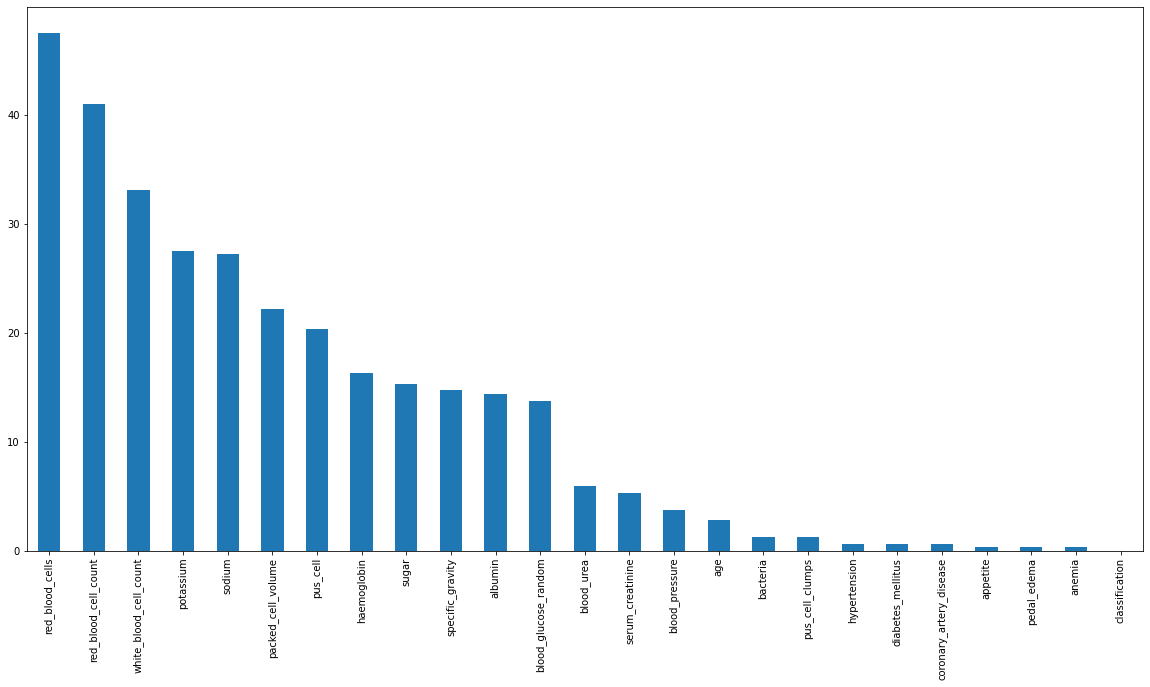

In [9]:
_ = ((df.isnull().sum()/df.shape[0])*125).sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Lets analyze each attribute
Here we check for the outliers or missing values for the attribute, and then address these issues.

In [10]:
Numerical_Features = ['age', 
                      'blood_pressure', 
                      'blood_glucose_random', 
                      'blood_urea', 
                      'serum_creatinine', 
                      'sodium', 
                      'potassium', 
                      'haemoglobin', 
                      'packed_cell_volume', 
                      'white_blood_cell_count', 
                      'red_blood_cell_count']

Categorical_Features = ['specific_gravity', 
                        'albumin', 
                        'sugar', 
                        'red_blood_cells', 
                        'pus_cell', 
                        'pus_cell_clumps', 
                        'bacteria', 
                        'hypertension', 
                        'diabetes_mellitus', 
                        'coronary_artery_disease', 
                        'appetite', 
                        'pedal_edema', 
                        'anemia', 
                        'classification']
    

### Checking Features Distribution for Numerical Features

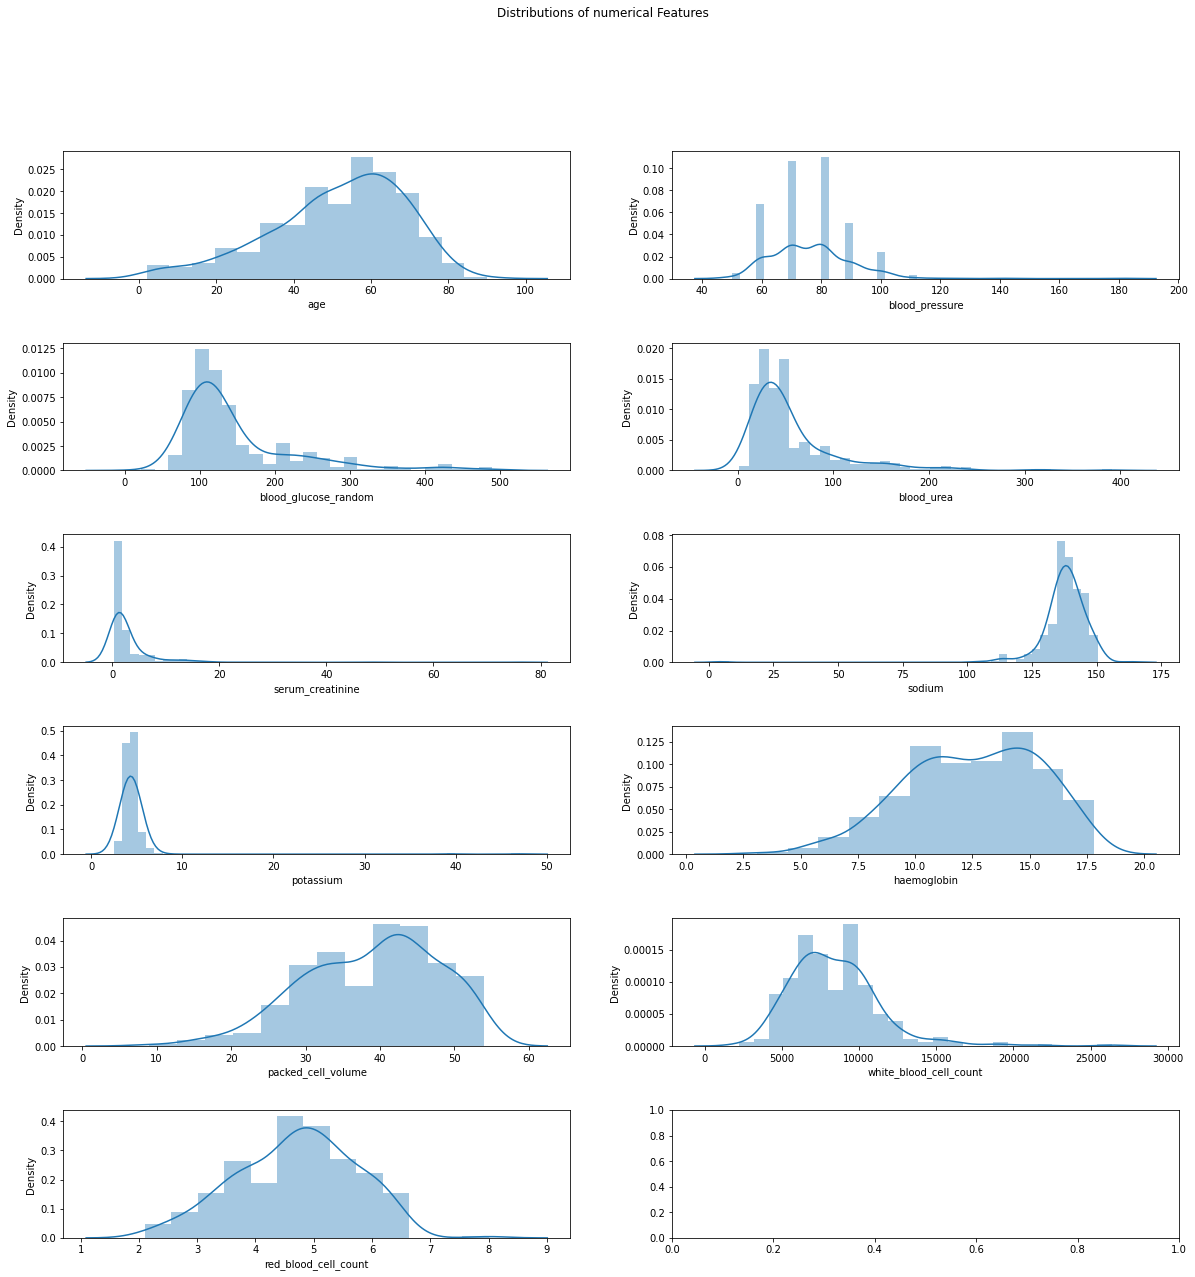

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,20))
_ = fig.subplots_adjust(hspace=0.5)
_ = fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), Numerical_Features):
    _ = sns.distplot(a=df[feats], ax=ax)

#### OBSERVATIONS:
1. Age looks a bit left skewed.  
2. Blood Glucose Random is right skewed.  
3. Blood Urea is also a bit right skewed.  
4. Rest of the features are lightly skewed.

In [12]:
def replace_with_mean_per_class(attr):
    attr_mean_per_class = df.loc[:, [attr, 'classification']].groupby(by=['classification']).mean()
    attr_and_class = df.loc[:, [attr, 'classification']]
    attr_and_class[attr] = np.where(attr_and_class['classification'] == 'ckd', 
                                attr_and_class[attr].fillna(attr_mean_per_class.loc[0, attr]),
                                attr_and_class[attr].fillna(attr_mean_per_class.loc[1, attr]))
    df[attr] = attr_and_class[attr]

#### bp attribute

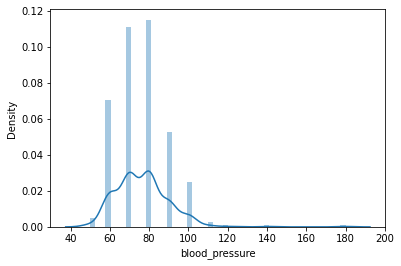

In [13]:
_ = sns.distplot(df['blood_pressure'], bins=50, kde=True)

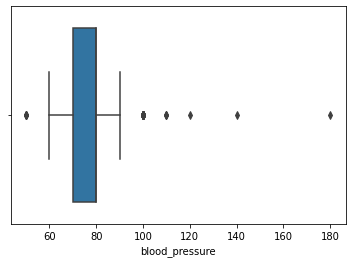

In [14]:
_ = sns.boxplot(x=df['blood_pressure'])

In [15]:
bp_Q1 = df['blood_pressure'].quantile(0.25)
bp_Q3 = df['blood_pressure'].quantile(0.75)
bp_IQR = bp_Q3 - bp_Q1
bp_Lower_Whisker = bp_Q1 - 1.5*bp_IQR
bp_Upper_Whisker = bp_Q3 + 1.5*bp_IQR

bp_new = df.blood_pressure[df['blood_pressure'] < bp_Upper_Whisker]
df['blood_pressure'] = bp_new[bp_new > bp_Lower_Whisker]

_ = replace_with_mean_per_class('blood_pressure')

#### bgr attribute

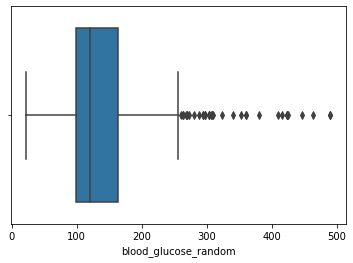

In [16]:
_ = sns.boxplot(x=df['blood_glucose_random'])

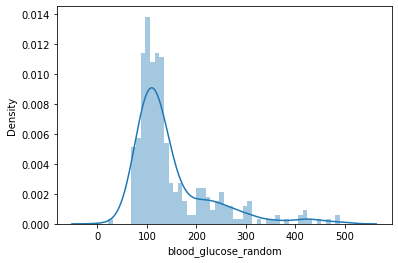

In [17]:
_ = sns.distplot(df['blood_glucose_random'], bins=50, kde=True)

In [18]:
bgr_Q1 = df['blood_glucose_random'].quantile(0.25)
bgr_Q3 = df['blood_glucose_random'].quantile(0.75)
bgr_IQR = bgr_Q3 - bgr_Q1
bgr_Lower_Whisker = bgr_Q1 - 1.5*bgr_IQR
bgr_Upper_Whisker = bgr_Q3 + 1.5*bgr_IQR

df['blood_glucose_random'] = df.blood_glucose_random[df['blood_glucose_random'] < bgr_Upper_Whisker]
_ = replace_with_mean_per_class('blood_glucose_random')

#### bu attribute

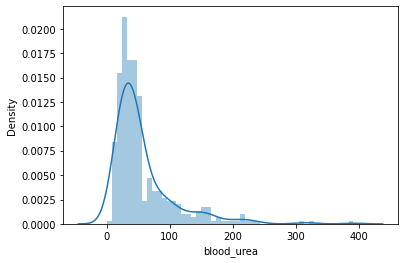

In [19]:
_ = sns.distplot(df['blood_urea'], bins=50, kde=True)

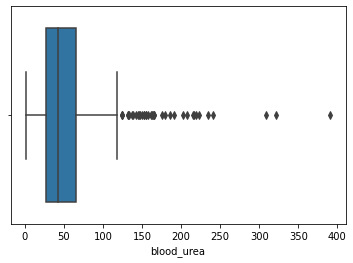

In [20]:
_ = sns.boxplot(x=df['blood_urea'])

#### OBSERVATIONS:
1. blood_urea has a few outliers, precisely beyond the point 300
2. So, lets trim the values which are beyond 300 for the blood_urea attribute

In [21]:
df['blood_urea'] = df.blood_urea[df['blood_urea'] < 300.0]
_ = replace_with_mean_per_class('blood_urea')

#### OBSERVATIONS:
The rest of the attributes do not have outliers, so we will simply replace the missing values for those attributes with the mean corresponding to their class label.  
1. age
2. serum_creatinine
3. sodium
4. potassium
5. haemoglobin
6. packed_cell_volume
7. white_blood_cell_count
8. red_blood_cell_count

In [22]:
_ = replace_with_mean_per_class('age')
_ = replace_with_mean_per_class("serum_creatinine")
_ = replace_with_mean_per_class('sodium')
_ = replace_with_mean_per_class('potassium')

_ = replace_with_mean_per_class('haemoglobin')
_ = replace_with_mean_per_class('packed_cell_volume')
_ = replace_with_mean_per_class('white_blood_cell_count')
_ = replace_with_mean_per_class('red_blood_cell_count')

### Lets find the Correlation for the numerical attributes

In [23]:
ndf = df[Numerical_Features]
ndf.corr()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.0000,0.1090,0.2176,0.1886,0.1258,-0.0877,0.0503,-0.2006,-0.2298,0.1181,-0.1988
blood_pressure,0.1090,1.0000,0.1521,0.2038,0.1568,-0.1699,0.1041,-0.2220,-0.2322,0.0055,-0.2027
blood_glucose_random,0.2176,0.1521,1.0000,0.2285,0.1908,-0.1677,0.1773,-0.3511,-0.3396,0.1606,-0.3094
blood_urea,0.1886,0.2038,0.2285,1.0000,0.5266,-0.3551,0.1478,-0.5548,-0.5383,0.1079,-0.4683
serum_creatinine,0.1258,0.1568,0.1908,0.5266,1.0000,-0.6132,0.2081,-0.3626,-0.3627,0.0138,-0.3388
sodium,-0.0877,-0.1699,-0.1677,-0.3551,-0.6132,1.0000,0.0569,0.3682,0.3739,-0.0052,0.3509
potassium,0.0503,0.1041,0.1773,0.1478,0.2081,0.0569,1.0000,-0.1249,-0.1443,-0.0668,-0.1351
haemoglobin,-0.2006,-0.2220,-0.3511,-0.5548,-0.3626,0.3682,-0.1249,1.0000,0.8880,-0.1922,0.7810
packed_cell_volume,-0.2298,-0.2322,-0.3396,-0.5383,-0.3627,0.3739,-0.1443,0.8880,1.0000,-0.2137,0.7763
white_blood_cell_count,0.1181,0.0055,0.1606,0.1079,0.0138,-0.0052,-0.0668,-0.1922,-0.2137,1.0000,-0.1754


In [24]:
ndf.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,51.5321,74.5202,129.9745,55.3930,3.0852,136.8378,4.6758,12.3503,37.9633,8558.0582,4.4829
std,16.9822,9.1804,40.1697,42.7372,5.6277,9.3362,2.8219,2.8036,8.4900,2541.9104,0.9187
min,2.0000,60.0000,22.0000,1.5000,0.4000,4.5000,2.5000,3.1000,9.0000,2200.0000,2.1000
25%,42.0000,70.0000,101.0000,27.0000,0.9000,133.9018,4.0000,10.6475,32.9399,6975.0000,3.9452
50%,54.5413,76.4216,124.0000,43.0000,1.3000,136.0000,4.7000,12.1000,37.0000,9069.5364,4.1000
75%,64.0000,80.0000,143.3258,68.9496,3.0500,141.0000,4.8784,14.8000,44.0000,9400.0000,5.2000
max,90.0000,90.0000,256.0000,241.0000,76.0000,163.0000,47.0000,17.8000,54.0000,26400.0000,8.0000


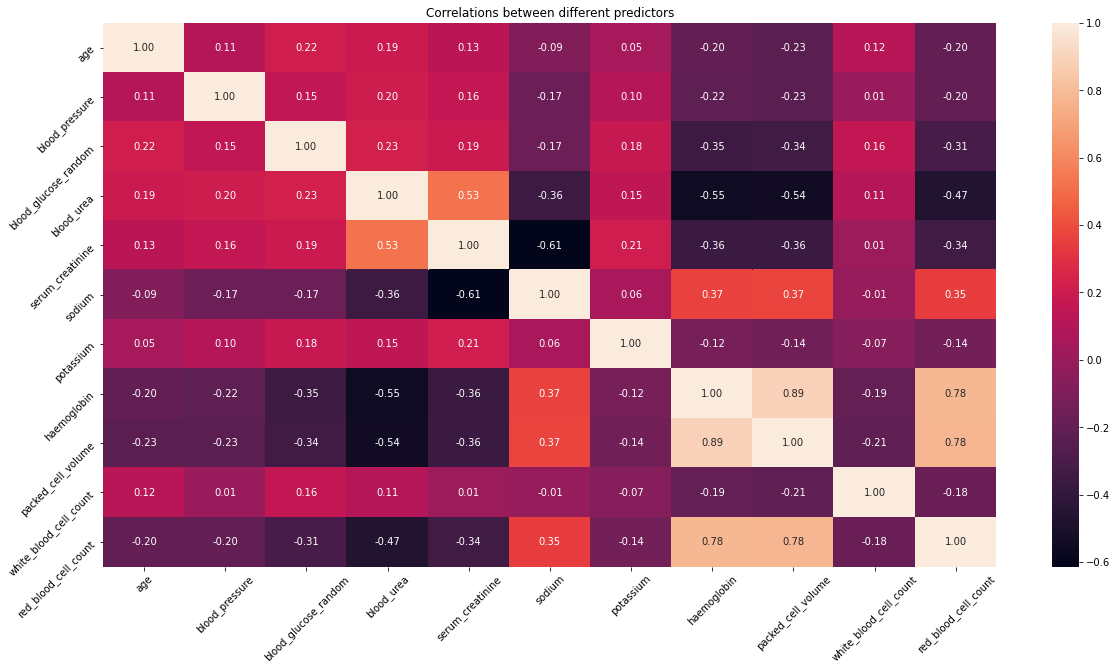

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
_ = sns.heatmap(ndf.corr(), annot=True, fmt='.2f', ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

#### OBSERVATIONS:
1. CORR(haemoglobin, red_blood_cell_count) = 0.78
2. CORR(packed_cell_volume, red_blood_cell_count) = 0.78
3. CORR(haemoglobin, packed_cell_volume) = 0.89
4. CORR(serum_creatinine, sodium) = -0.61
5. CORR(blood_urea, haemoglobin) = -0.55
6. CORR(blood_urea, serum_creatinine) = 0.53

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Checking Features Distribution for Categorical Features

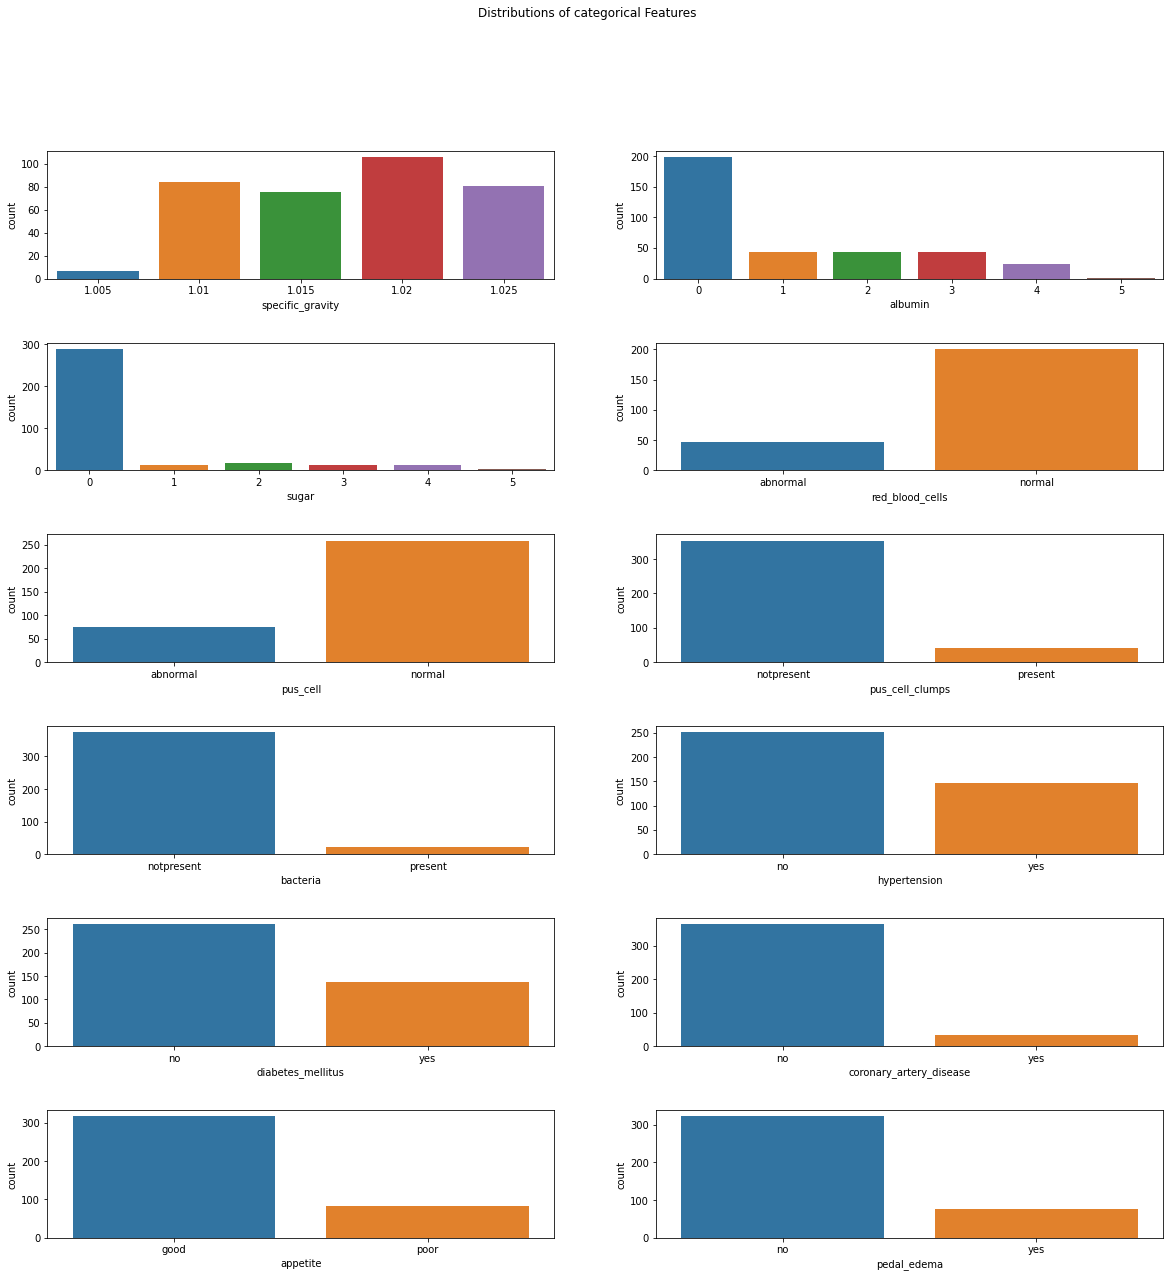

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), Categorical_Features):
    sns.countplot(df[feats], ax=ax)

#### OBSERVATIONS:
A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

In [27]:
cdf = df[Categorical_Features]
cdf.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
hypertension,yes,no,no,yes,no,yes,no,no,yes,yes
diabetes_mellitus,yes,no,yes,no,no,yes,no,yes,yes,yes
coronary_artery_disease,no,no,no,no,no,no,no,no,no,no


In [28]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   specific_gravity         353 non-null    category
 1   albumin                  354 non-null    category
 2   sugar                    351 non-null    category
 3   red_blood_cells          248 non-null    category
 4   pus_cell                 335 non-null    category
 5   pus_cell_clumps          396 non-null    category
 6   bacteria                 396 non-null    category
 7   hypertension             398 non-null    category
 8   diabetes_mellitus        398 non-null    category
 9   coronary_artery_disease  398 non-null    category
 10  appetite                 399 non-null    category
 11  pedal_edema              399 non-null    category
 12  anemia                   399 non-null    category
 13  classification           400 non-null    category
dtypes: categor

In [29]:
def replace_categorical_missing_values_with_mode(attr):
    attr_cls = cdf.loc[:, [attr, 'classification']]
    attr_cls_ckd_mode = attr_cls[attr_cls['classification'] == 'ckd'].mode()
    attr_cls_notckd_mode = attr_cls[attr_cls['classification'] == 'notckd'].mode()
    attr_modified = attr_cls.groupby('classification')[attr].transform(lambda x: x.fillna(x.mode()[0]))
    cdf[attr] = attr_modified

In [30]:
replace_categorical_missing_values_with_mode('specific_gravity')
replace_categorical_missing_values_with_mode('albumin')
replace_categorical_missing_values_with_mode('sugar')
replace_categorical_missing_values_with_mode('red_blood_cells')

replace_categorical_missing_values_with_mode('pus_cell')
replace_categorical_missing_values_with_mode('pus_cell_clumps')
replace_categorical_missing_values_with_mode('bacteria')
replace_categorical_missing_values_with_mode('hypertension')

replace_categorical_missing_values_with_mode('diabetes_mellitus')
replace_categorical_missing_values_with_mode('coronary_artery_disease')
replace_categorical_missing_values_with_mode('appetite')
replace_categorical_missing_values_with_mode('anemia')
replace_categorical_missing_values_with_mode('pedal_edema')

In [31]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   specific_gravity         400 non-null    category
 1   albumin                  400 non-null    category
 2   sugar                    400 non-null    category
 3   red_blood_cells          400 non-null    category
 4   pus_cell                 400 non-null    category
 5   pus_cell_clumps          400 non-null    category
 6   bacteria                 400 non-null    category
 7   hypertension             400 non-null    category
 8   diabetes_mellitus        400 non-null    category
 9   coronary_artery_disease  400 non-null    category
 10  appetite                 400 non-null    category
 11  pedal_edema              400 non-null    category
 12  anemia                   400 non-null    category
 13  classification           400 non-null    category
dtypes: categor

In [32]:
cdf.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,normal,normal,normal,normal,normal,normal,normal,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,normal,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
hypertension,yes,no,no,yes,no,yes,no,no,yes,yes
diabetes_mellitus,yes,no,yes,no,no,yes,no,yes,yes,yes
coronary_artery_disease,no,no,no,no,no,no,no,no,no,no


### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Lets merge the modified dataset together  
Here the idea is to merge the following dataframes:
- ndf (Numerical Features of the dataset)
- cdf (Categorical Features of the dataset)

In [33]:
ndf.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0,51.0000,60.0,68.0000,24.0000,52.0000,53.0
blood_pressure,80.0000,76.4216,80.0000,70.0,80.0000,90.0,70.0000,76.4216,76.4216,90.0
blood_glucose_random,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
blood_urea,36.0000,18.0000,53.0000,56.0,26.0000,25.0,54.0000,31.0000,60.0000,107.0
serum_creatinine,1.2000,0.8000,1.8000,3.8,1.4000,1.1,24.0000,1.1000,1.9000,7.2
sodium,133.9018,133.9018,133.9018,111.0,133.9018,142.0,104.0000,133.9018,133.9018,114.0
potassium,4.8784,4.8784,4.8784,2.5,4.8784,3.2,4.0000,4.8784,4.8784,3.7
haemoglobin,15.4000,11.3000,9.6000,11.2,11.6000,12.2,12.4000,12.4000,10.8000,9.5
packed_cell_volume,44.0000,38.0000,31.0000,32.0,35.0000,39.0,36.0000,44.0000,33.0000,29.0
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0,7300.0000,7800.0,9069.5364,6900.0000,9600.0000,12100.0


In [34]:
cdf.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,normal,normal,normal,normal,normal,normal,normal,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,normal,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
hypertension,yes,no,no,yes,no,yes,no,no,yes,yes
diabetes_mellitus,yes,no,yes,no,no,yes,no,yes,yes,yes
coronary_artery_disease,no,no,no,no,no,no,no,no,no,no


In [35]:
chronic_kidney_diease_modified_dataframe = ndf.join(cdf)
df = chronic_kidney_diease_modified_dataframe.copy()
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0000,51.0000,60.0000,68.0000,24.0000,52.0000,53.0000
blood_pressure,80.0000,76.4216,80.0000,70.0000,80.0000,90.0000,70.0000,76.4216,76.4216,90.0000
blood_glucose_random,121.0000,143.3258,143.3258,117.0000,106.0000,74.0000,100.0000,143.3258,138.0000,70.0000
blood_urea,36.0000,18.0000,53.0000,56.0000,26.0000,25.0000,54.0000,31.0000,60.0000,107.0000
serum_creatinine,1.2000,0.8000,1.8000,3.8000,1.4000,1.1000,24.0000,1.1000,1.9000,7.2000
sodium,133.9018,133.9018,133.9018,111.0000,133.9018,142.0000,104.0000,133.9018,133.9018,114.0000
potassium,4.8784,4.8784,4.8784,2.5000,4.8784,3.2000,4.0000,4.8784,4.8784,3.7000
haemoglobin,15.4000,11.3000,9.6000,11.2000,11.6000,12.2000,12.4000,12.4000,10.8000,9.5000
packed_cell_volume,44.0000,38.0000,31.0000,32.0000,35.0000,39.0000,36.0000,44.0000,33.0000,29.0000
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0000,7300.0000,7800.0000,9069.5364,6900.0000,9600.0000,12100.0000


In [36]:
# use the following code to store the modified dataframe into a csv file.
# df.to_csv ('chronic_kidney_disease_processed_dataframe.csv', index = False, header=True)

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Building the Baseline Model
1. Here we will split the entire dataset into training and testing data.
2. We will apply the following classification algorithms to build our initial models.  
    a. Logistic Regression  
    b. KNN  
    c. Decision Trees  
    d. Random Forest  

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      400 non-null    float64 
 1   blood_pressure           400 non-null    float64 
 2   blood_glucose_random     400 non-null    float64 
 3   blood_urea               400 non-null    float64 
 4   serum_creatinine         400 non-null    float64 
 5   sodium                   400 non-null    float64 
 6   potassium                400 non-null    float64 
 7   haemoglobin              400 non-null    float64 
 8   packed_cell_volume       400 non-null    float64 
 9   white_blood_cell_count   400 non-null    float64 
 10  red_blood_cell_count     400 non-null    float64 
 11  specific_gravity         400 non-null    category
 12  albumin                  400 non-null    category
 13  sugar                    400 non-null    category
 14  red_blood_

In [38]:
Numerical_Features = ['age', 
                      'blood_pressure', 
                      'blood_glucose_random', 
                      'blood_urea', 
                      'serum_creatinine', 
                      'sodium', 
                      'potassium', 
                      'haemoglobin', 
                      'packed_cell_volume', 
                      'white_blood_cell_count', 
                      'red_blood_cell_count']

Categorical_Features = ['specific_gravity', 
                        'albumin', 
                        'sugar', 
                        'red_blood_cells', 
                        'pus_cell', 
                        'pus_cell_clumps', 
                        'bacteria', 
                        'hypertension', 
                        'diabetes_mellitus', 
                        'coronary_artery_disease', 
                        'appetite', 
                        'pedal_edema', 
                        'anemia']

In [39]:
independent_features = df.iloc[:, :-1]
independent_features = pd.get_dummies(independent_features, columns = Categorical_Features)

In [40]:
independent_features.shape

(400, 48)

In [41]:
independent_features.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0,51.0000,60.0,68.0000,24.0000,52.0000,53.0
blood_pressure,80.0000,76.4216,80.0000,70.0,80.0000,90.0,70.0000,76.4216,76.4216,90.0
blood_glucose_random,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
blood_urea,36.0000,18.0000,53.0000,56.0,26.0000,25.0,54.0000,31.0000,60.0000,107.0
serum_creatinine,1.2000,0.8000,1.8000,3.8,1.4000,1.1,24.0000,1.1000,1.9000,7.2
sodium,133.9018,133.9018,133.9018,111.0,133.9018,142.0,104.0000,133.9018,133.9018,114.0
potassium,4.8784,4.8784,4.8784,2.5,4.8784,3.2,4.0000,4.8784,4.8784,3.7
haemoglobin,15.4000,11.3000,9.6000,11.2,11.6000,12.2,12.4000,12.4000,10.8000,9.5
packed_cell_volume,44.0000,38.0000,31.0000,32.0,35.0000,39.0,36.0000,44.0000,33.0000,29.0
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0,7300.0000,7800.0,9069.5364,6900.0000,9600.0000,12100.0


In [43]:
numerical_independent_features = independent_features.loc[:, Numerical_Features]

In [44]:
sc = StandardScaler()
numerical_independent_features.iloc[:,:] = sc.fit_transform(numerical_independent_features.iloc[:,:])

In [45]:
independent_features.loc[:, Numerical_Features] = numerical_independent_features

In [46]:
X = independent_features.iloc[:,:]
Y = df.iloc[:, -1]

In [47]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [49]:
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,-0.2082,-2.6256,0.6172,-0.2082,-0.0314,0.4993,0.9709,-1.6233,0.0276,0.0865
blood_pressure,0.5976,0.2074,0.5976,-0.4930,0.5976,1.6883,-0.4930,0.2074,0.2074,1.6883
blood_glucose_random,-0.2237,0.3328,0.3328,-0.3234,-0.5976,-1.3952,-0.7471,0.3328,0.2000,-1.4949
blood_urea,-0.4543,-0.8760,-0.0561,0.0142,-0.6886,-0.7121,-0.0326,-0.5715,0.1079,1.2091
serum_creatinine,-0.3354,-0.4066,-0.2287,0.1272,-0.2998,-0.3532,3.7211,-0.3532,-0.2109,0.7321
sodium,-0.3149,-0.3149,-0.3149,-2.7709,-0.3149,0.5536,-3.5217,-0.3149,-0.3149,-2.4492
potassium,0.0719,0.0719,0.0719,-0.7720,0.0719,-0.5236,-0.2398,0.0719,0.0719,-0.3462
haemoglobin,1.0892,-0.3751,-0.9822,-0.4108,-0.2680,-0.0537,0.0178,0.0178,-0.5537,-1.0179
packed_cell_volume,0.7119,0.0043,-0.8212,-0.7033,-0.3495,0.1223,-0.2315,0.7119,-0.5853,-1.0571
white_blood_cell_count,-0.2986,-1.0076,-0.4168,-0.7319,-0.4955,-0.2986,0.2015,-0.6531,0.4104,1.3952


In [50]:
X.shape

(400, 48)

In [52]:
X.columns

Index(['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'specific_gravity_1.005', 'specific_gravity_1.01',
       'specific_gravity_1.015', 'specific_gravity_1.02',
       'specific_gravity_1.025', 'albumin_0', 'albumin_1', 'albumin_2',
       'albumin_3', 'albumin_4', 'albumin_5', 'sugar_0', 'sugar_1', 'sugar_2',
       'sugar_3', 'sugar_4', 'sugar_5', 'red_blood_cells_abnormal',
       'red_blood_cells_normal', 'pus_cell_abnormal', 'pus_cell_normal',
       'pus_cell_clumps_notpresent', 'pus_cell_clumps_present',
       'bacteria_notpresent', 'bacteria_present', 'hypertension_no',
       'hypertension_yes', 'diabetes_mellitus_no', 'diabetes_mellitus_yes',
       'coronary_artery_disease_no', 'coronary_artery_disease_yes',
       'appetite_good', 'appetite_poor', 'pedal_edema_no', 'pedal_edema_yes',
       'anemia_no', 'an

In [51]:
Y.shape

(400,)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2021)

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(300, 48)
(300,)
(100, 48)
(100,)


#### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=2021)
logistic_regression.fit(X_train, Y_train)

LogisticRegression(random_state=2021)

In [57]:
Y_pred = logistic_regression.predict(X_test)

In [59]:
cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
print("Accuracy : ",100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Accuracy :  98.0


In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_regression, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.33 %
Standard Deviation: 1.33 %


#### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [63]:
Y_pred = knn_classifier.predict(X_test)

In [64]:
cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
print("Accuracy : ",100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Accuracy :  97.0


In [65]:
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.33 %
Standard Deviation: 2.33 %


#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
print("Accuracy : ",100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Accuracy :  99.0


In [68]:
accuracies = cross_val_score(estimator = dt_classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.67 %
Standard Deviation: 2.21 %


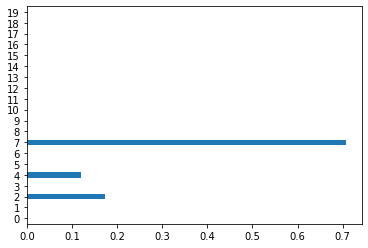

In [72]:
important_columns = pd.Series(dt_classifier.feature_importances_)
important_columns.nlargest(20).plot(kind='barh')
plt.show()

#### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rn_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rn_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [74]:
Y_pred = rn_classifier.predict(X_test)

In [75]:
cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
print("Accuracy : ",100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Accuracy :  100.0


In [76]:
accuracies = cross_val_score(estimator = rn_classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.67 %
Standard Deviation: 1.00 %


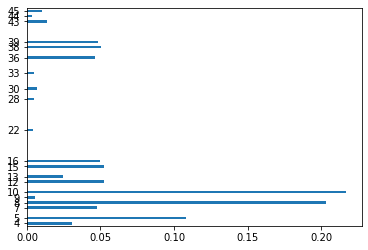

In [81]:
important_columns = pd.Series(rn_classifier.feature_importances_)
important_columns.nlargest(20).plot(kind='barh')
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Model Building and Evaluation

### THE END